In [1]:
import os
import numpy as np
import pandas as pd 
#import modin.pandas as pd
from tqdm import tqdm
import re
import datetime
from functools import partial
import gc


#from cuml.cluster import HDBSCAN
#from cuml.metrics.cluster.silhouette_score import cython_silhouette_score

In [2]:
df_vector_bodies = pd.DataFrame(np.load("vector200_bodies.npy"))

from cuml.cluster import HDBSCAN
#from cuml.metrics import pairwise_distances # GPU Mem Allocation Error

X = df_vector_bodies[df_vector_bodies.columns]

cmodel = HDBSCAN(min_samples=5)
labels = cmodel.fit_predict(X)
print(labels.shape)



Label prop iterations: 34
Label prop iterations: 16
Label prop iterations: 10
Label prop iterations: 10
Label prop iterations: 5
Label prop iterations: 6
Label prop iterations: 2
Iterations: 7
49220,314,15832,18,667,19213
Label prop iterations: 5
Label prop iterations: 2
Label prop iterations: 2
Iterations: 3
1790,152,7351,9,283,530
Label prop iterations: 3
Iterations: 1
1722,81,3674,6,96,170
(1121263,)


<AxesSubplot:ylabel='$\\lambda$ value'>

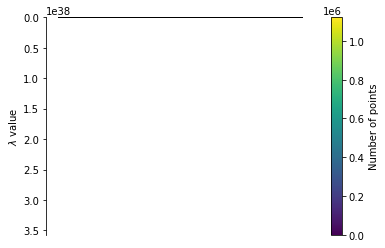

In [6]:
cmodel.condensed_tree_.plot()

In [3]:
X.values.shape

(1121263, 768)

In [4]:
labels.shape[0]

1121263

In [7]:
np.unique(labels)

array([   -1,     0,     1, ..., 35729, 35730, 35731], dtype=int32)

In [2]:
from sklearn.metrics import silhouette_score 

X = np.load("vector200_bodies.npy")
for i in tqdm(range(5,16)):
    labels = np.load("subjectHDBSCAN_s"+str(i)+".npy")
    score = 0.0
    for samp in tqdm(range(10)):
        score+= silhouette_score(X, labels, metric="euclidean", n_jobs= 6, sample_size= 50000)
    score/=10.0
    print("The silhouette score of sample number %i is:", i, score)

    gc.collect()

  9%|▉         | 1/11 [10:18<1:43:08, 618.85s/it]

The silhouette score of sample number %i is: 5 -0.15589947402477264


 18%|█▊        | 2/11 [19:29<1:26:47, 578.61s/it]

The silhouette score of sample number %i is: 6 -0.1806469514966011


 27%|██▋       | 3/11 [28:40<1:15:29, 566.13s/it]

The silhouette score of sample number %i is: 7 -0.1985750153660774


 36%|███▋      | 4/11 [38:42<1:07:42, 580.34s/it]

The silhouette score of sample number %i is: 8 -0.21064962595701217


 45%|████▌     | 5/11 [48:49<58:59, 589.99s/it]  

The silhouette score of sample number %i is: 9 -0.21880279034376143


 55%|█████▍    | 6/11 [58:48<49:24, 592.85s/it]

The silhouette score of sample number %i is: 10 -0.22570005059242249


 64%|██████▎   | 7/11 [1:08:45<39:36, 594.15s/it]

The silhouette score of sample number %i is: 11 -0.22447270005941392


 73%|███████▎  | 8/11 [1:18:39<29:42, 594.26s/it]

The silhouette score of sample number %i is: 12 -0.22848022729158401


 82%|████████▏ | 9/11 [1:28:31<19:46, 593.39s/it]

The silhouette score of sample number %i is: 13 -0.2279387965798378


 91%|█████████ | 10/11 [1:38:24<09:53, 593.57s/it]

The silhouette score of sample number %i is: 14 -0.22943190336227418


100%|██████████| 11/11 [1:48:16<00:00, 590.60s/it]

The silhouette score of sample number %i is: 15 -0.2325552895665169


In [3]:
from sklearn.metrics import silhouette_score 

X = np.load("vector200_bodies.npy")
for i in tqdm(range(17,21)):
    labels = np.load("subjectHDBSCAN_s"+str(i)+".npy")
    score = 0.0
    for samp in tqdm(range(10)):
        score+= silhouette_score(X, labels, metric="euclidean", n_jobs= 6, sample_size= 50000)
    score/=10.0
    print("The silhouette score of sample number %i is:", i, score)

    gc.collect()

 25%|██▌       | 1/4 [07:58<23:54, 478.33s/it]

The silhouette score of sample number %i is: 17 -0.23315811157226562


 50%|█████     | 2/4 [15:51<15:50, 475.41s/it]

The silhouette score of sample number %i is: 18 -0.2367166608572006


 75%|███████▌  | 3/4 [23:46<07:55, 475.12s/it]

The silhouette score of sample number %i is: 19 -0.23569630235433578


100%|██████████| 4/4 [31:35<00:00, 473.99s/it]

The silhouette score of sample number %i is: 20 -0.23546288311481475


In [ ]:
from cuml.metrics.cluster.silhouette_score import cython_silhouette_score
#from sklearn import metrics 

X = np.load("vector200_bodies.npy")
labels = np.load("subjectHDBSCAN.npy")

score = cython_silhouette_score(X, labels, metric="euclidean", chunksize= 100)
print(score)

np.save("subjectHDBSCAN.npy", labels)
gc.collect()

CUDADriverError: CUDA_ERROR_INVALID_VALUE: invalid argument

In [6]:
df_all_commiters = pd.read_csv("./commiters_emails.csv")

In [7]:
labels = np.load("subjectHDBSCAN.npy")

In [12]:
np.unique(labels)

array([   -1,     0,     1, ..., 35729, 35730, 35731], dtype=int32)

In [8]:
df_all_commiters["subjectlabel"] = pd.Series(labels)

In [9]:
df_all_commiters.head()

,message_id,references,project_name,list_name,date,dealised_author_full_name,subject,body,subjectlabel
0,<CA+FBdFQ7jRT+mr9Q-Ew=5k8Kc7zbeT3aMn5PoYLbTt9L...,<CAJjAHoMFvhT+xv21hh6r_Myxzk2vpRAhLLB_-K2eA8we...,superset,dev,2017-06-05 10:12:28,Ashutosh Chauhan,check -- -,yes list fri jun jim jagielski jim com write g...,-1
1,<CA+FBdFRTx6k6EMebeb4jh_62Z4-LuU0a=tKAabBb2shv...,<CAHEEp7WxZztTjyZ0Tz+oPeHAPHPoPBZb71hoL4njtfg7...,superset,dev,2017-09-26 09:47:56,Ashutosh Chauhan,react apache superset,indeed great news ashutosh mon sep pm maxime b...,-1
2,<JIRA.13130300.1515699055000.127061.1517866140...,<JIRA.13130300.1515699055000@Atlassian.JIRA> <...,superset,dev,2018-02-05 21:29:00,Ashutosh Chauhan,jira commented superset- send password creatio...,page com atlassian jira plugin system issuetab...,-1
3,<BANLkTi=gMnmH146_FTiQH3ahQnnpeUp_8A@mail.gmai...,<BANLkTi=oq_QEwnwfwmcbrL8p9DdnCwObUw@mail.gmai...,flume,dev,2011-06-23 17:57:03,Aaron Kimball,plan moving mailing list apache,thu jun pm jonathan hsieh jon com write arg se...,-1
4,<CAGfeOkdx-oTBnpeFhmmeTUZeSc_mofzO25jz20eVKOL+...,<CACAoQH2JT4uoOZGRe5dS=tUyQtG=VzFDqNcoEpvPb5RJ...,cordova,dev,2012-01-06 11:59:06,Dan Silivestru,doe anyone actually like jira email sent -dev ...,well fri jan gtanner com write get rid jira em...,-1


In [10]:
df_all_commiters["subjectlabel"].describe()

count    1.121263e+06
mean     8.231926e+03
std      1.244473e+04
min     -1.000000e+00
25%     -1.000000e+00
50%     -1.000000e+00
75%      1.594200e+04
max      3.573100e+04
Name: subjectlabel, dtype: float64

In [11]:
len(df_all_commiters["subjectlabel"].unique())

35733

In [2]:
import cubertopic

ModuleNotFoundError: No module named 'cubertopic'

In [3]:
from cuBERTopic import gpu_BERTopic

ModuleNotFoundError: No module named 'cuBERTopic'

### Enviorment notes
+ dask-cudf 22.4.0 requires cupy-cuda115, which is not installed.